## Making Products Count: Data Science for Product Managers
HW 1: Calculating Customer Lifetime Value

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt 

import warnings
warnings.filterwarnings("ignore")


In [2]:
dataframe = pd.read_csv("HW1 clv_transactions.csv")
dataframe

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94
...,...,...,...,...
4181,4182,6/23/2013,1000,3.86
4182,4183,8/7/2011,1000,4.00
4183,4184,10/7/2012,1000,18.37
4184,4185,1/9/2014,1000,3.45


In [3]:
dataframe.describe()
#This is preliminary analysis on amount, not applicable to customerID
#and transaction ID

,TransactionID,CustomerID,Amount
count,4186.000000,4186.000000,4186.000000
mean,2093.500000,516.165791,9.028082
std,1208.538442,291.465283,38.723909
min,1.000000,1.000000,-1.000000
25%,1047.250000,270.000000,3.310000
50%,2093.500000,522.000000,6.885000
75%,3139.750000,762.750000,11.690000
max,4186.000000,1000.000000,2033.000000


In [4]:
#Let's chech if the dataframe has null values
dataframe.isnull().sum()
#There are no null values in the dataframe

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

In [5]:
#As while reading the file date column is read as string hence formatting becomes essential
#Range of dates in a dataframe
dataframe['TransactionDate'] = pd.to_datetime(dataframe['TransactionDate'], format='%m/%d/%Y')


In [6]:
#To find the range of dates
print("Date ranges from: ", dataframe['TransactionDate'].min(), " to ", dataframe['TransactionDate'].max())

Date ranges from:  2010-01-04 00:00:00  to  2015-12-31 00:00:00


In [7]:
print("Number of unique customers: ", len(dataframe['CustomerID'].unique()))

Number of unique customers:  1000


In [8]:
#Standard descriptive statistics for Amount field
dataframe['Amount'].describe()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

In [9]:
print("Standard deviation: ", (np.array(dataframe['Amount'])).std())

Standard deviation:  38.71928309075012


In [10]:
print("Variance ", (np.array(dataframe['Amount'])).var())

Variance  1499.182883061648


In [11]:
#Lets see if the if number of amounts have increased over the years
dataframe['Year'] = dataframe['TransactionDate'].dt.year
dataframe['Amount'].groupby(dataframe.Year).count()

Year
2010     260
2011     441
2012     649
2013     827
2014     945
2015    1064
Name: Amount, dtype: int64

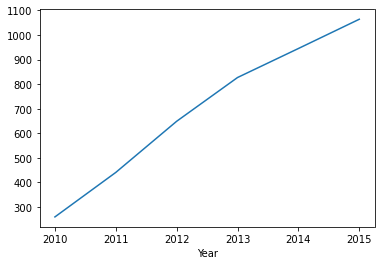

In [12]:
#Transaction Amount over the years
(dataframe['Amount'].groupby(dataframe.Year).count()).plot()
plt.ylabel="Amount"
plt.show()
#From the graph it can be seen that transaction amounts have increased over time


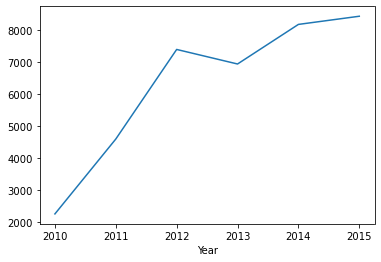

In [13]:
(dataframe['Amount'].groupby(dataframe.Year).sum()).plot(x='Year', y='Amount')
plt.ylabel='Amount'
plt.show()

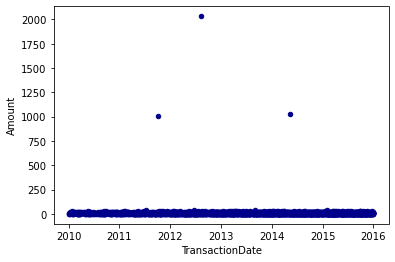

In [14]:
dataframe.plot.scatter(x="TransactionDate", y="Amount", c="DarkBlue")
plt.show()
# Looks like there are few values which are way off than the actual distribution

<AxesSubplot:ylabel='Frequency'>

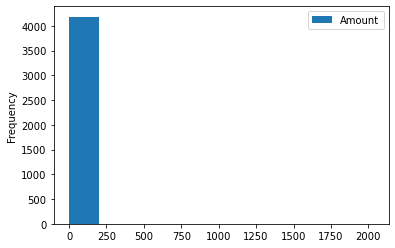

In [15]:
dataframe.plot.hist(x="TransactionDate", y="Amount")
#As we can see from the histogram it shows only few values and not a distribution
#Outliers are present

In [16]:
#Checking if the values in amount field are negative
dataframe[dataframe['Amount']<0].sum()

TransactionID    3377.0
CustomerID        824.0
Amount             -2.0
Year             4026.0
dtype: float64

In [17]:
#These values which are very high and are negative are outliers
#To address these outliers we can simply discard those entries from
#the dataframe as they seem to be wrong entries
#due to data entry error as amount can't be negative and way off than majority of the values
dataframe = dataframe[(dataframe['Amount'] < 750) & (dataframe['Amount'] > 0)]

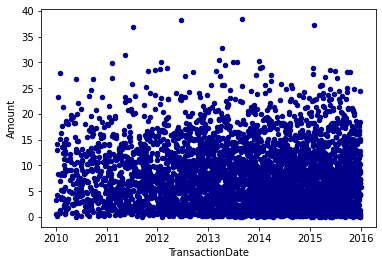

In [18]:
#Treated dataframe which has no outliers
dataframe.plot.scatter(x="TransactionDate", y="Amount", c="DarkBlue")
plt.show()

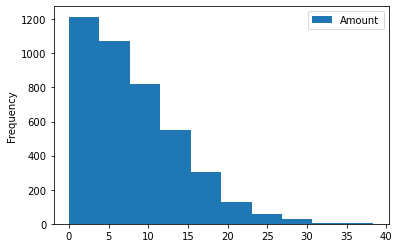

In [19]:
dataframe.plot.hist(x="TransactionDate", y="Amount")
plt.show()
#The below graph is correct representation of data

In [20]:
#Origin years of customer
dataframe['CustomerID'].groupby(dataframe.Year).nunique()

Year
2010    172
2011    263
2012    359
2013    478
2014    548
2015    612
Name: CustomerID, dtype: int64

In [21]:
dataframe.sort_values('TransactionDate', inplace=True)

In [22]:
originYear = dataframe.groupby(dataframe['CustomerID'])
originYear = originYear.agg(originYear = ('Year', np.min))

clvDataframe = pd.merge(dataframe, originYear, on='CustomerID')

In [23]:
clvDataframe
#These are the years for which customer's first transaction was recorded

,TransactionID,TransactionDate,CustomerID,Amount,Year,originYear
0,1737,2010-01-04,429,3.27,2010,2010
1,1747,2010-06-15,429,2.63,2010,2010
2,1738,2010-11-06,429,1.37,2010,2010
3,1740,2011-02-26,429,9.98,2011,2010
4,1743,2011-10-07,429,4.66,2011,2010
...,...,...,...,...,...,...
4176,967,2015-12-24,241,24.47,2015,2015
4177,620,2015-12-25,157,1.29,2015,2015
4178,1143,2015-12-27,290,1.03,2015,2015
4179,2923,2015-12-28,716,7.43,2015,2015


In [24]:
#Step 4
ageDataframe = clvDataframe["CustomerID"].groupby(by=clvDataframe["originYear"]).nunique().reset_index()

In [25]:
ageDataframe

,originYear,CustomerID
0,2010,172
1,2011,170
2,2012,163
3,2013,180
4,2014,155
5,2015,160


In [26]:
#We can calculate the age by simply calculating the difference in years and multiplying by 12
clvDataframe['Age'] = (clvDataframe['Year'] - clvDataframe['originYear'] + 1 ) * 12

In [27]:
clvDataframe

,TransactionID,TransactionDate,CustomerID,Amount,Year,originYear,Age
0,1737,2010-01-04,429,3.27,2010,2010,12
1,1747,2010-06-15,429,2.63,2010,2010,12
2,1738,2010-11-06,429,1.37,2010,2010,12
3,1740,2011-02-26,429,9.98,2011,2010,24
4,1743,2011-10-07,429,4.66,2011,2010,24
...,...,...,...,...,...,...,...
4176,967,2015-12-24,241,24.47,2015,2015,12
4177,620,2015-12-25,157,1.29,2015,2015,12
4178,1143,2015-12-27,290,1.03,2015,2015,12
4179,2923,2015-12-28,716,7.43,2015,2015,12


In [28]:
cumulativeDataFrame = pd.pivot_table(clvDataframe, values="Amount", index=['originYear'], columns=['Age'], aggfunc=np.sum)

In [29]:
#This dataframe gives total transaction amount for customer in a time period
cumulativeDataFrame

Age,12,24,36,48,60,72
originYear,,,,,,
2010,2259.67,1355.11,1660.03,1357.56,1298.32,1033.8
2011,2238.46,1519.44,1708.09,1237.12,1159.13,NaN
2012,2181.35,1693.34,1352.17,1274.99,NaN,NaN
2013,2179.85,1429.96,1617.94,NaN,NaN,NaN
2014,1830.85,1431.20,NaN,NaN,NaN,NaN
2015,1912.17,NaN,NaN,NaN,NaN,NaN


In [30]:
#the below data consists of cumulative sum of amount over the year
clvDataframe.sort_values(["CustomerID", "Age"]).reset_index(drop=True)
data = clvDataframe.groupby(by = ["originYear", "Year", "Age"])["Amount"].sum().groupby(by =["originYear"]).cumsum().reset_index()

In [31]:
mergedData = pd.merge(data, ageDataframe, on="originYear") 
mergedData

,originYear,Year,Age,Amount,CustomerID
0,2010,2010,12,2259.67,172
1,2010,2011,24,3614.78,172
2,2010,2012,36,5274.81,172
3,2010,2013,48,6632.37,172
4,2010,2014,60,7930.69,172
5,2010,2015,72,8964.49,172
6,2011,2011,12,2238.46,170
7,2011,2012,24,3757.90,170
8,2011,2013,36,5465.99,170
9,2011,2014,48,6703.11,170


In [32]:
amount = mergedData.pivot(index="originYear", columns="Age", values="Amount").reset_index()

In [33]:
age = mergedData.pivot(index="originYear", columns="Age", values="CustomerID").reset_index()

In [34]:
#Calculating History CLV
historic = (amount/age)
historic["originYear"] = age["originYear"]

In [35]:
#Formatting the output
amount['originYear'] = amount['originYear'].astype(str) +"-01-01 "+ amount['originYear'].astype(str) +"-12-31"
age['originYear'] = age['originYear'].astype(str) +"-01-01 "+ age['originYear'].astype(str) +"-12-31"
historic['originYear'] = historic['originYear'].astype(str) +"-01-01 "+ historic['originYear'].astype(str) +"-12-31"

In [36]:
amount.fillna(0)

Age,originYear,12,24,36,48,60,72
0,2010-01-01 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
1,2011-01-01 2011-12-31,2238.46,3757.90,5465.99,6703.11,7862.24,0.00
2,2012-01-01 2012-12-31,2181.35,3874.69,5226.86,6501.85,0.00,0.00
3,2013-01-01 2013-12-31,2179.85,3609.81,5227.75,0.00,0.00,0.00
4,2014-01-01 2014-12-31,1830.85,3262.05,0.00,0.00,0.00,0.00
5,2015-01-01 2015-12-31,1912.17,0.00,0.00,0.00,0.00,0.00


In [37]:
age.fillna(0)

Age,originYear,12,24,36,48,60,72
0,2010-01-01 2010-12-31,172.0,172.0,172.0,172.0,172.0,172.0
1,2011-01-01 2011-12-31,170.0,170.0,170.0,170.0,170.0,0.0
2,2012-01-01 2012-12-31,163.0,163.0,163.0,163.0,0.0,0.0
3,2013-01-01 2013-12-31,180.0,180.0,180.0,0.0,0.0,0.0
4,2014-01-01 2014-12-31,155.0,155.0,0.0,0.0,0.0,0.0
5,2015-01-01 2015-12-31,160.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dataforPlot= np.array(historic)

In [39]:
historic.fillna(0)

Age,originYear,12,24,36,48,60,72
0,2010-01-01 2010-12-31,13.137616,21.016163,30.667500,38.560291,46.108663,52.119128
1,2011-01-01 2011-12-31,13.167412,22.105294,32.152882,39.430059,46.248471,0.000000
2,2012-01-01 2012-12-31,13.382515,23.771104,32.066626,39.888650,0.000000,0.000000
3,2013-01-01 2013-12-31,12.110278,20.054500,29.043056,0.000000,0.000000,0.000000
4,2014-01-01 2014-12-31,11.811935,21.045484,0.000000,0.000000,0.000000,0.000000
5,2015-01-01 2015-12-31,11.951063,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
ageforplot = [12,24,36,48,60,72]
data2010 = dataforPlot[0,1:]
data2011 = dataforPlot[1,1:]
data2012 = dataforPlot[2,1:]
data2013 = dataforPlot[3,1:]
data2014 = dataforPlot[4,1:]
data2015 = dataforPlot[5,1:]

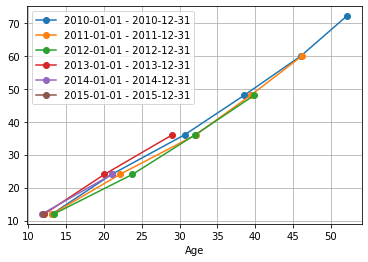

In [41]:
#Plot for individual year
plt.plot(data2010, ageforplot, marker='o', label = "2010-01-01 - 2010-12-31")
plt.plot(data2011, ageforplot, marker='o', label = "2011-01-01 - 2011-12-31")
plt.plot(data2012, ageforplot, marker='o', label = "2012-01-01 - 2012-12-31")
plt.plot(data2013, ageforplot, marker='o', label = "2013-01-01 - 2013-12-31")
plt.plot(data2014, ageforplot, marker='o', label = "2014-01-01 - 2014-12-31")
plt.plot(data2015, ageforplot, marker='o', label = "2015-01-01 - 2015-12-31")
plt.xlabel("Age")
plt.ylabel = "Historic CLV"
plt.legend()
plt.grid()
plt.show()

In [42]:
age = age.iloc[:,1:]
historic = historic.iloc[:,1:]
weighted = historic*age

In [43]:
#Single CLV plot weighted
weightedPlot =[ weighted.iloc[:,0:1].sum()/age.iloc[:,0:1].sum(), \
    weighted.iloc[:,1:2].sum()/age.iloc[:,1:2].sum(),
    weighted.iloc[:,2:3].sum()/age.iloc[:,2:3].sum(), 
    weighted.iloc[:,3:4].sum()/age.iloc[:,3:4].sum(), 
    weighted.iloc[:,4:5].sum()/age.iloc[:,4:5].sum(),
    weighted.iloc[:,5:6].sum()/age.iloc[:,5:6].sum()  ]

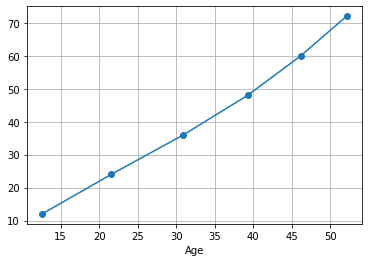

In [44]:
plt.plot(weightedPlot, ageforplot, marker="o")
plt.xlabel("Age")
plt.ylabel = "Historic CLV"
plt.grid()
plt.show()

Customers acquired in 2011 have spent ~$46 to date.
All the other group of customers exhibit the same pattern of spending.
Due to which it is safe to assume $52 is a lower bound on CLV as the first customer
was acquired in 2010 and that customer has maximum age till date
This also means high clv translate to better market-product fit and recurring revenue from the customers